In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import logging
import pandas as pd
import numpy as np
import pylab as pl

from cnaster.config import JSONConfig
from cnaster.io import get_spots, get_meta, get_umis
from cnaster.sim.io import get_truth
from cnaster.sim.clone import (
    Clone,
    get_clones,
    query_clones,
    construct_frac_cnas,
    get_cnas,
)

In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(filename)s:%(lineno)d - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

logger = logging.getLogger(__name__)

# NOTES
- current sim. configuration assumes tumor purity of unity

In [4]:
run_id = 0
cpath = "/Users/mw9568/repos/cnaster/sim_config.json"
sample_name = "cnaster_002"

config = JSONConfig.from_file(cpath)

In [5]:
spots = get_spots(config, run_id, sample_name)
meta = get_meta(config, run_id, sample_name)
truth = get_truth(config, run_id, sample_name)

df = pd.merge(spots, meta, on="barcode")
df = pd.merge(df, truth, on="barcode")
df

2025-06-17 10:32:12 - cnaster.io - INFO - io.py:13 - Reading spots from /Users/mw9568/scratch/cnaster/run0/cnaster_002/cnaster_002_visium.tsv.gz


,barcode,x,y,z,umis,snp_umis,clone,tumor_purity
0,VIS00000,-15.0,0.000000,2.5,4255,363,-1,0.0
1,VIS00001,-14.0,0.000000,2.5,1187,340,-1,0.0
2,VIS00002,-13.0,0.000000,2.5,2453,886,-1,0.0
3,VIS00003,-12.0,0.000000,2.5,2764,324,-1,0.0
4,VIS00004,-11.0,0.000000,2.5,2995,362,-1,0.0
...,...,...,...,...,...,...,...,...
4895,VIS04895,84.5,59.755753,2.5,2386,372,4,1.0
4896,VIS04896,85.5,59.755753,2.5,2528,432,4,1.0
4897,VIS04897,86.5,59.755753,2.5,2414,419,4,1.0
4898,VIS04898,87.5,59.755753,2.5,4533,173,4,1.0


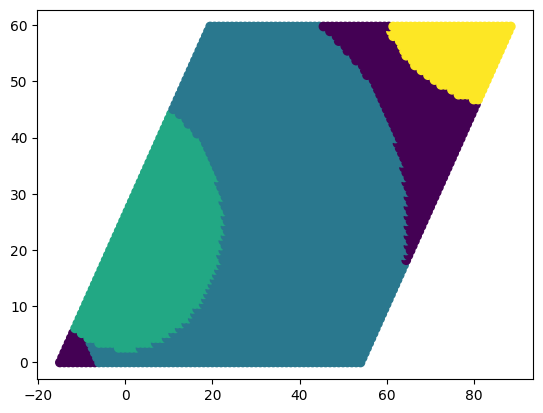

In [6]:
pl.scatter(df["x"], df["y"], c=df["clone"])

In [7]:
clone_ids = np.unique(df["clone"])
clone_ids

array([-1,  1,  2,  4])

In [8]:
clones = get_clones(config)
len(clones)

4

In [9]:
cnas = get_cnas(config, clone_ids)
cnas

[[['1,1', 395500, 495500],
  ['1,1', 395500, 495500],
  ['1,0', 198500, 298500],
  ['1,1', 435000, 535000],
  ['2,2', 196000, 296000],
  ['1,1', 103000, 203000],
  ['1,0', 519000, 619000],
  ['2,2', 940500, 1040500],
  ['1,0', 742000, 842000],
  ['2,2', 431500, 531500]],
 [['1,1', 381500, 481500],
  ['1,1', 381500, 481500],
  ['1,1', 395500, 495500],
  ['1,0', 281500, 381500],
  ['1,1', 510000, 610000],
  ['1,0', 47500, 147500],
  ['1,0', 961500, 1061500],
  ['2,1', 878500, 978500],
  ['2,1', 839000, 939000],
  ['1,1', 270000, 370000]],
 [['2,2', 246000, 346000],
  ['1,0', 875500, 975500],
  ['1,1', 402000, 502000],
  ['1,0', 1073000, 1173000],
  ['1,1', 947500, 1047500],
  ['2,1', 785000, 885000],
  ['2,1', 480000, 580000],
  ['2,2', 742500, 842500],
  ['2,1', 514000, 614000],
  ['2,1', 251000, 351000]]]

In [10]:
num_segments = config.mappable_genome_kbp // config.segment_size_kbp

segments = config.segment_size_kbp * np.arange(num_segments) / 1.0e3
rdrs, bafs = construct_frac_cnas(num_segments, config.segment_size_kbp, 1.0, cnas[0])

Text(0.5, 0, 'Mappable genome [1Mb]')

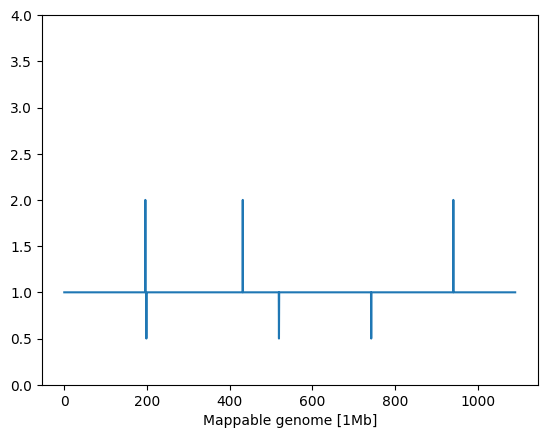

In [11]:
pl.plot(segments, rdrs)
# pl.xlim(0.0, 1.0)
pl.ylim(0.0, 4.0)

pl.xlabel("Mappable genome [1Mb]")

# Done.